In [2]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models
import numpy as np 
import matplotlib.pyplot as plt


In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
## displaying first 5 items of y train
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
## converting 2d array to 1d
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

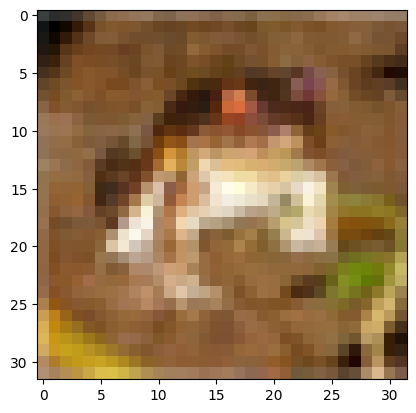

In [7]:
plt.imshow(x_train[0])

In [8]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
## image is quite big, we'll reshape it and display its label
def plotsample(x, y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(x[index]) # displays the actual picture
    plt.xlabel(classes[y[index]])  ## y[index] is basically the number  of class that this picture belongs to


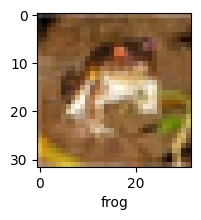

In [10]:
## lets plot first image of our train data and display its label
plotsample(x_train, y_train, 0)

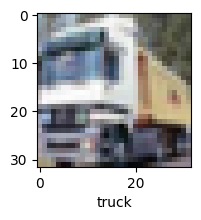

In [11]:
plotsample(x_train, y_train, 1)

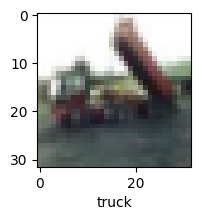

In [12]:
plotsample(x_train, y_train, 2)

In [13]:
## we always need to normalize images:
x_train = x_train/255
x_test = x_test/255

In [14]:
cnn = models.Sequential(
    [
        ## cnn
        layers.Conv2D(filters = 32, kernel_size= (3,3), activation="relu", input_shape=(32,32,3)),
        layers.MaxPooling2D(pool_size=(2,2)),

        layers.Conv2D(filters = 64, kernel_size= (3,3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        # flatten then dense layer
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax'),

    ]
)

In [15]:
cnn.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')

In [16]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10


1563/1563 [==============================] - 71s 43ms/step - loss: 1.4534 - accuracy: 0.4752
Epoch 2/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.1059 - accuracy: 0.6147
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9721 - accuracy: 0.6614
Epoch 4/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8863 - accuracy: 0.6922
Epoch 5/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.8186 - accuracy: 0.7166
Epoch 6/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.7695 - accuracy: 0.7327
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7242 - accuracy: 0.7485
Epoch 8/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6773 - accuracy: 0.7649
Epoch 9/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6392 - accuracy: 0.7773
Epoch 10/10
1563/1563 [==============================] - 60s 3

In [17]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 6s 15ms/step - loss: 0.8867 - accuracy: 0.7077


[0.8866929411888123, 0.7077000141143799]

In [18]:
# Save the model to a file using pickle
import pickle
with open('model.pickle', 'wb') as file:
    pickle.dump(cnn, file)

In [19]:
# Load the model from the pickle file
import pickle
with open('model.pickle', 'rb') as file:
    loaded_model = pickle.load(file)
# Load and preprocess the image
from tensorflow.keras.preprocessing import image
img_path = 'test1.jpeg'
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to between 0 and 1

# Make predictions
predictions = loaded_model.predict(img_array)
predictions

1/1 [==============================] - 0s 208ms/step


array([[1.9890617e-04, 8.4864604e-04, 1.6405046e-11, 3.0190531e-06,
        1.9378951e-06, 1.4797609e-05, 1.4965543e-05, 1.4163040e-06,
        2.4621236e-12, 9.9891639e-01]], dtype=float32)

In [20]:
# Assuming your model is a classification model with 10 classes
class_index = np.argmax(predictions)
predicted_class = classes[class_index]
print(f"The predicted class is: {predicted_class}")

The predicted class is: truck
